# Creando el primer gráfico con Seaborn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data/Inmigrantes_Canadá.csv")
df.set_index("Pais", inplace=True)
anos = list(map(str, range(1980, 2014)))
chile = df.loc["Chile", anos]
cl_dict = {"Año": chile.index.tolist(), "Inmigrantes": chile.values.tolist()}
datos_cl = pd.DataFrame(cl_dict)

In [2]:
import seaborn as sns

In [3]:
# configurar un tema por defecto para todas las gráficas que se vayan a crear
sns.set_theme()

## Revisando datos globales históricos de inmigración a Canadá

In [5]:
top_10 = df.sort_values('Total', ascending=False).head(10)
top_10

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
India,Asia,Sur de Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Asia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido,Europa,Norte de Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Asia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistán,Asia,Sur de Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos,América del Norte,América del Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irán,Asia,Sur de Asia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Sur de Asia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Corea del Sur,Asia,Asia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


<Axes: xlabel='Total', ylabel='Pais'>

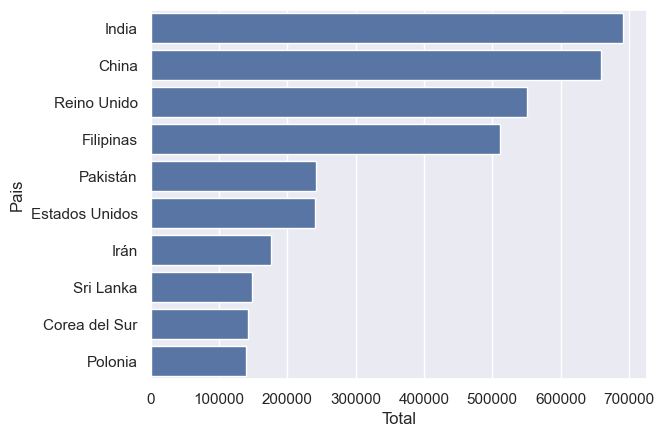

In [6]:
# gráfico de barras
sns.barplot(data=top_10, x='Total', y=top_10.index, orient='h')